<a href="https://colab.research.google.com/github/lahiruC22/crypto-trading-algorithm/blob/main/crypto_trading_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cryptocurrency Trading Algorithm  
### 1. Cryptocurrency
The currencies you are familiar are known as *flat currencies.* They are issued by the government and central authority regulate and govern it's use. Eg: Central Bank.  
Cryptocurrency has no central authority. All the transactions in regarding to the cryptocurrency are held in a ledger which is secured cryptographically.  
### 2. Algorithmic Trading  
This is a way to automate making decisions on when to buy or sell an asset based on some pre-programmed instructions and criteria.  

In order to make a cryptocurrency trading algorithm, you should do the following tasks.  


*   Fetch cryptocurrency market prices and data
*   Perform basic analysis of market behaviour.
*   Implement a simple algorithmic trading stradegy
*   Analyze the performance of the trading algorithm.

### Fetch Market Data  
We use `yfinance` python library to easily access yahoo finance website and save the cryptocurrency market data.

In [1]:
!pip install yfinance

Now, we need to import the necessary libraries as follows.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

### Get familiar with Bitcoin-USD Exchange Rate Data  
From the following way we can get the exchange rate of Bitcoin to US Dollars over the year of 2020. Here we specify the currency conversation, start date, end date and the time interval between datapoints. (we specify the interval for 1 day.)

In [3]:
# Retrieve two weeks of bitcoin to USD exchange rates with a 1 day interval and save the dataframe to the variable
BTC_USD = yf.download("BTC-USD",start='2020-01-01',end='2020-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


Let's get a sense about this market data.

In [4]:
BTC_USD.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


As you can see, there are 7 columns in the dataframe. Here open column gives the opening price of Bitcoin in USD for the day, followed by day's price high and low. The day's closing prices and adjusted closing prices, and trading volum are also included in here.

### Create a Price Chart
Price charts are an essential tool for understanding and analyzing a given stock or currency. This is a time series showing an asset's price over time.

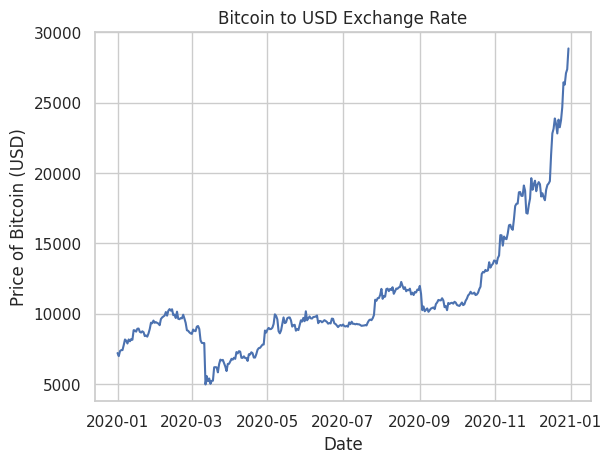

In [9]:
sns.set_theme(style='whitegrid')

# Plot the data
sns.lineplot(data=BTC_USD, x='Date', y= BTC_USD['Close'].values.flatten())

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Price of Bitcoin (USD)')
plt.title('Bitcoin to USD Exchange Rate')
plt.show()

From the above price chart we see that there's a steep upward trend in Bitcoin price starting around October but due to the random nature of short term price movements, the line chart fluctuates and looks noisy. To help reveal longer term and smooth out short term fluctuations, a common method is to calculate and study Moving Averages.


### Computing Simple Moving Averages

In [7]:
# Compute 9-Day Simple moving average
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

# Compute 30-Day Simple moving average
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

BTC_USD.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_9,SMA_30
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,,
2020-01-01,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,7200.174316,7200.174316
2020-01-02,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,7092.822266,7092.822266
2020-01-03,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,7176.842936,7176.842936
2020-01-04,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,7235.296387,7235.296387
2020-01-05,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7270.500586,7270.500586


In [8]:
BTC_USD.tail()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_9,SMA_30
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,,
2020-12-26,26437.037109,26437.037109,26718.070312,24522.689453,24677.015625,48332647295,23905.591363,20518.139062
2020-12-27,26272.294922,26272.294922,28288.839844,25922.769531,26439.373047,66479895605,24253.850694,20823.602148
2020-12-28,27084.808594,27084.808594,27389.111328,26207.640625,26280.822266,49056742893,24611.070312,21135.848633
2020-12-29,27362.437500,27362.437500,27370.720703,25987.298828,27081.810547,45265946774,25042.752821,21442.013737
2020-12-30,28840.953125,28840.953125,28937.740234,27360.089844,27360.089844,51287442704,25713.627387,21749.184310


### Plot the Simple Moving Averages


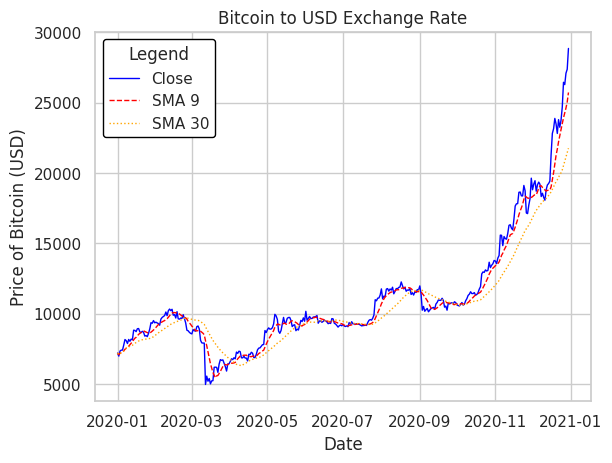

In [16]:
# Set the theme
sns.set_theme(style='whitegrid')

# Plot the data with labels and customized line styles
sns.lineplot(data=BTC_USD,
             x='Date',
             y=BTC_USD['Close'].values.flatten(),
             label='Close',
             color='blue',
             linewidth=1)

sns.lineplot(data=BTC_USD,
             x='Date',
             y=BTC_USD['SMA_9'].values.flatten(),
             label='SMA 9',
             color='red',
             linewidth=1,
             linestyle='--')

sns.lineplot(data=BTC_USD,
             x='Date',
             y=BTC_USD['SMA_30'].values.flatten(),
             label='SMA 30',
             color='orange',
             linewidth=1,
             linestyle=':')

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Price of Bitcoin (USD)')
plt.title('Bitcoin to USD Exchange Rate')

# Add the legend with a clearer background
plt.legend(title='Legend', facecolor='white', framealpha=1, edgecolor='black')

# Show the plot
plt.show()

Observing the plot, it's evident that the Simple Moving Averages effectively smooth out the Bitcoin price fluctuations. The short-term variations are significantly reduced, allowing the moving averages to highlight longer-term trends.


### Moving Average Crossover Strategy
One of the most straightforward trading strategies utilizing Simple Moving Averages is the Moving Average Crossover. The core concept behind this strategy involves using two Simple Moving Averages—one with a shorter sampling interval and the other with a longer interval. When the shorter moving average crosses above the longer moving average, it can indicate a potential trend reversal. For instance, if the shorter-term moving average is initially below the longer one but then crosses above it, this may suggest the onset of an upward (bullish) trend, serving as a buy signal. Conversely, if the shorter moving average is above the longer one and then crosses below, this could signal the beginning of a downward (bearish) trend, acting as a sell signal in this strategy.